# AI Tensorflow Lab #4
This lab implements a convolutional neural network for hand-written digits using tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Import MNIST

In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print (mnist.test.images.shape)
print (mnist.train.images.shape)
print (mnist.validation.images.shape)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(10000, 784)
(55000, 784)
(5000, 784)


# Hyperparameters

In [3]:
learning_rate = 1e-3
num_steps = 1000
batch_size = 100
display_step = 100

# Define the CNN

## Define input/output and Convert input back to 2D

In [4]:
# Reset graph content
tf.reset_default_graph()
images = tf.placeholder(tf.float32, [None, 784],name="pixels")
labels = tf.placeholder(tf.float32, [None, 10],name="labels")
images_2d = tf.reshape(images, [-1,28,28,1])
# Define as placeholder so we can use different value in training vs inference
dropout_rate = tf.placeholder(tf.float32)

## Define Conv #1

In [5]:
conv_1 = tf.layers.conv2d(
    inputs=images_2d,
    filters=16,
    kernel_size=[5,5],
    activation=tf.nn.relu,
    # strides=(1, 1) # default strides is 1x1
    padding="same", # or "valid" to shrink the output size
)

pool_1 = tf.layers.max_pooling2d(
    inputs=conv_1,
    pool_size=[2,2],
    strides=2)

## Define Conv #2

In [6]:
conv_2 = tf.layers.conv2d(
    inputs=pool_1,
    filters=16,
    kernel_size=[5,5],
    activation=tf.nn.relu,
    padding="same")

pool_2 = tf.layers.max_pooling2d(
    inputs=conv_2,
    pool_size=[2,2],
    strides=2)

## Conv #3 and apply dropout

In [7]:
conv_3 = tf.layers.conv2d(
    inputs=pool_2,
    filters=16,
    kernel_size=[5,5],
    activation=tf.nn.relu,
    padding="same")

dropout_3 = tf.layers.dropout(
    inputs=conv_3,
    rate=dropout_rate)

# Output layer

In [8]:
output_linear=tf.contrib.layers.flatten(dropout_3)
out_y = tf.layers.dense(
    inputs=output_linear,
    units=10,
    activation=tf.nn.softmax)

# Define training

In [9]:
# Note out_y is after the softmax so it does not fit tf.nn.softmax_cross_entropy_with_logits as logits
cross_entropy = -tf.reduce_sum(labels*tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_op = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

# Train

In [10]:
# Keep session open so we can do more fun stuff after training & testing
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(num_steps + 1):
    batch = mnist.train.next_batch(batch_size)
    sess.run(train_op, feed_dict={images:batch[0],
                                  labels:batch[1],
                                  dropout_rate:0.5})
    if i % display_step == 0:
        cp_value, trainAccuracy = sess.run([cross_entropy, accuracy],
            feed_dict={images:batch[0],
                       labels:batch[1]})
        print("step %d, cross_entropy %g, training accuracy %g"%(i, cp_value, trainAccuracy))
print("Training is completed")

step 0, cross_entropy 230.408, training accuracy 0.16
step 100, cross_entropy 192.98, training accuracy 0.81
step 200, cross_entropy 63.5529, training accuracy 0.85
step 300, cross_entropy 34.8652, training accuracy 0.93
step 400, cross_entropy 58.8069, training accuracy 0.84
step 500, cross_entropy 30.5424, training accuracy 0.91
step 600, cross_entropy 23.1904, training accuracy 0.93
step 700, cross_entropy 38.6558, training accuracy 0.93
step 800, cross_entropy 34.6322, training accuracy 0.87
step 900, cross_entropy 26.2909, training accuracy 0.94
step 1000, cross_entropy 22.5397, training accuracy 0.91
Training is completed


# Evaluate

In [11]:
print("Start evaluating")
testAccuracy = sess.run(accuracy, feed_dict={images: mnist.test.images,
                                             labels: mnist.test.labels})
print("test accuracy with dropout applied %g"%(testAccuracy))

Start evaluating
test accuracy with dropout applied 0.9268


# Fun part

# Visualize the convolutional layers (filters)

In [13]:
%matplotlib inline
import math
def visualizeActivations(layer, image_to_use):
    plt.figure(1, figsize=(15,15))
    image_to_use = np.reshape(image_to_use,[1,784])
    units = sess.run(layer, feed_dict={images: image_to_use})
    filters = units.shape[3]
    n_columns = 6 # columns per row
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
    # plt.title('Filter ' + str(i + 1))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

## Randomly choose a test image and try visualize

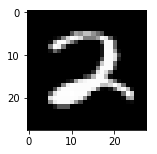

In [14]:
image_to_use = mnist.test.images[888];
visualizeActivations(images_2d, image_to_use)

## Visualize the 1st convolutional layer

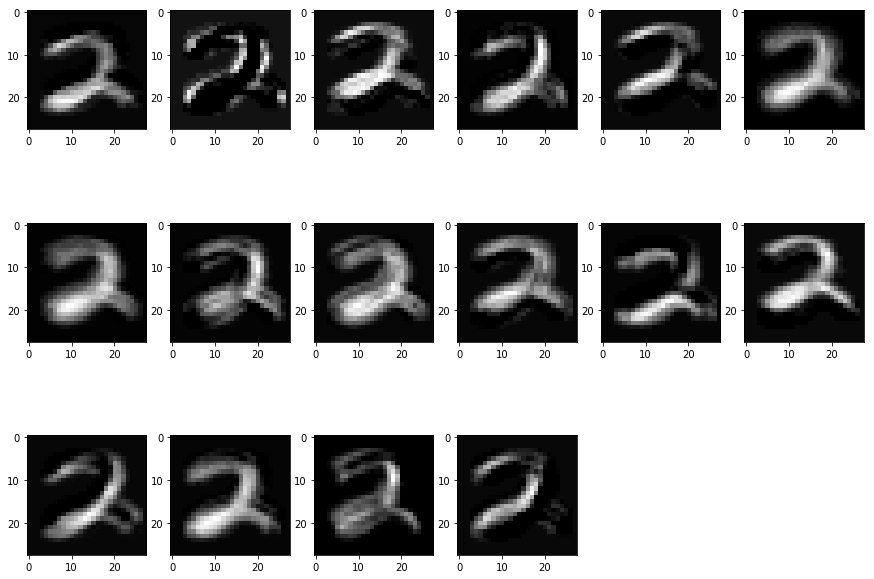

In [15]:
visualizeActivations(conv_1, image_to_use)

## Visualize the 1st max pooling layer

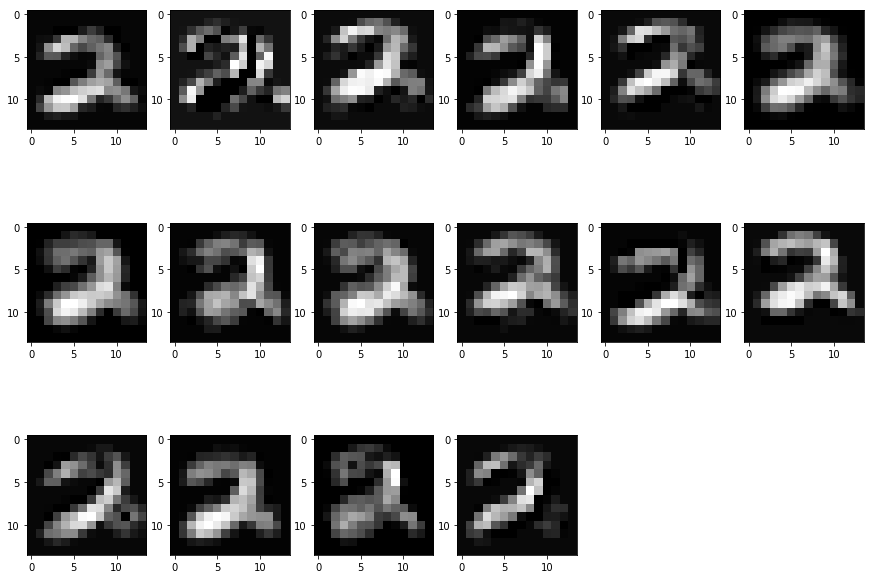

In [16]:
visualizeActivations(pool_1, image_to_use)

# Visualize 2nd con+max_pool layers!

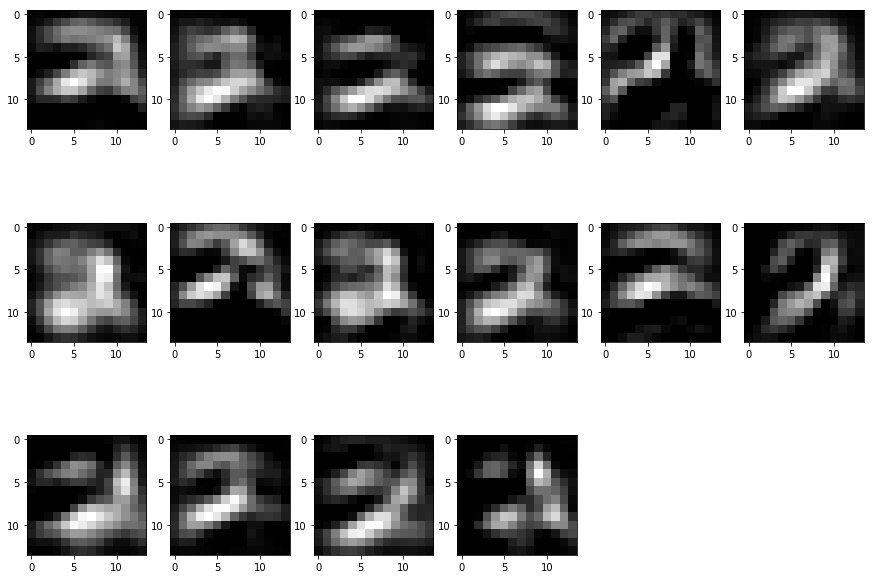

In [24]:
visualizeActivations(conv_2, image_to_use)

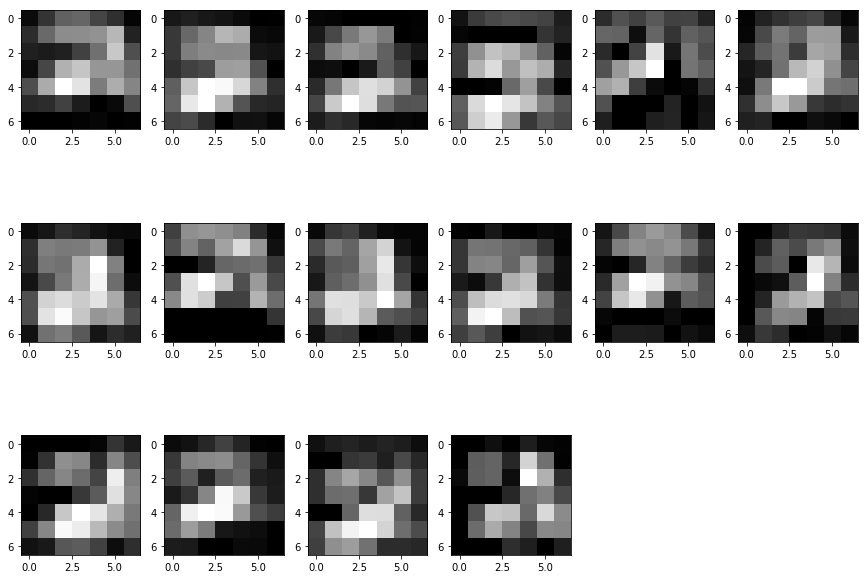

In [25]:
visualizeActivations(pool_2, image_to_use)

# And 3rd

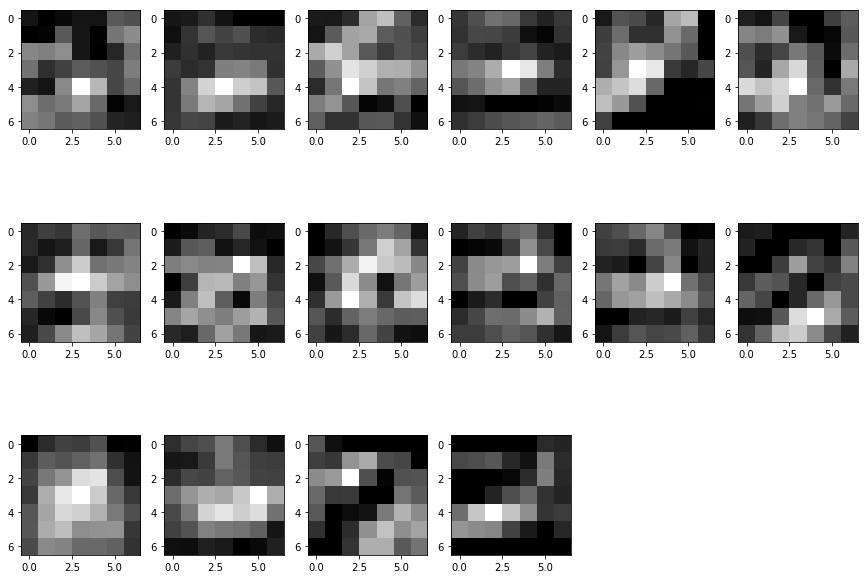

In [26]:
visualizeActivations(conv_3, image_to_use)